## Glob paths to my DEMs.

In [2]:
import glob
from concurrent.futures import ThreadPoolExecutor
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
path_list = glob.glob('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/watersheds/*')
csv_list = glob.glob('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/csvs/*')

In [3]:
path_list = [x.split(sep='/')[-1] for x in path_list]

In [4]:
def make_df(path):
    gdf = gpd.GeoDataFrame(data = pd.read_csv(path, index_col = 0))
    gdf = gdf.drop(columns=['y', 'max_y', 'x', 'max_x', 'rank'])
    return gdf

In [5]:
with ThreadPoolExecutor() as executor:
    results_iter = executor.map(make_df, csv_list)
    results = list(results_iter)

relief = pd.Series()
avg_elev = pd.Series()
for res in results:
    relief = pd.concat([relief, res.Relief], ignore_index=True)
    avg_elev = pd.concat([avg_elev, res.avg_elevation], ignore_index=True)

In [6]:
i=0
for res in results:
    min_el = avg_elev.quantile(0.9)
    max_r = relief.quantile(0.1)
    res['relict'] = [True if res.Relief.iloc[i] <= max_r and res.avg_elevation.iloc[i] >= max_r else False for i in range(len(res))]
    res['basin'] = i
    i+=1

In [7]:
# for res in results:
#     display(res[res.relict == True])

In [8]:
# fig, ax = plt.subplots(figsize=(20,20), dpi=300)

# i=0
# for path in path_list:
#     show(rasterio.open('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/watersheds/'+str(path)), ax=ax)
#     print(f'watershed {i} mapped')
#     i+=1
# plt.show()

In [9]:
# mk_plot = lambda path: show(rasterio.open('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/watersheds/'+str(path)), ax=ax)

# with ThreadPoolExecutor() as executor:
#     fig, ax = plt.subplots(figsize=(20,20), dpi=300)
#     ax.set_title('Basins overlaying VA basemap.')
#     ax.set_xlabel('Longitude (°)')
#     ax.set_ylabel('Latitude (°)')
#     with rasterio.open('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/get_basins.tiff') as src:
#         basemap = show(src, cmap='binary', ax=ax)
#     executor.map(mk_plot, path_list)

In [10]:
# i=0
# for path in path_list:
#     !python /sciclone/home/ntlewis/Nick-Lewis-Research/working_files/py_scripts/relief.py x x x x watersheds/{path} pngs/output_{i}.png csvs/relief_{i}.csv
#     i+=1

(-81.5, -80.2)

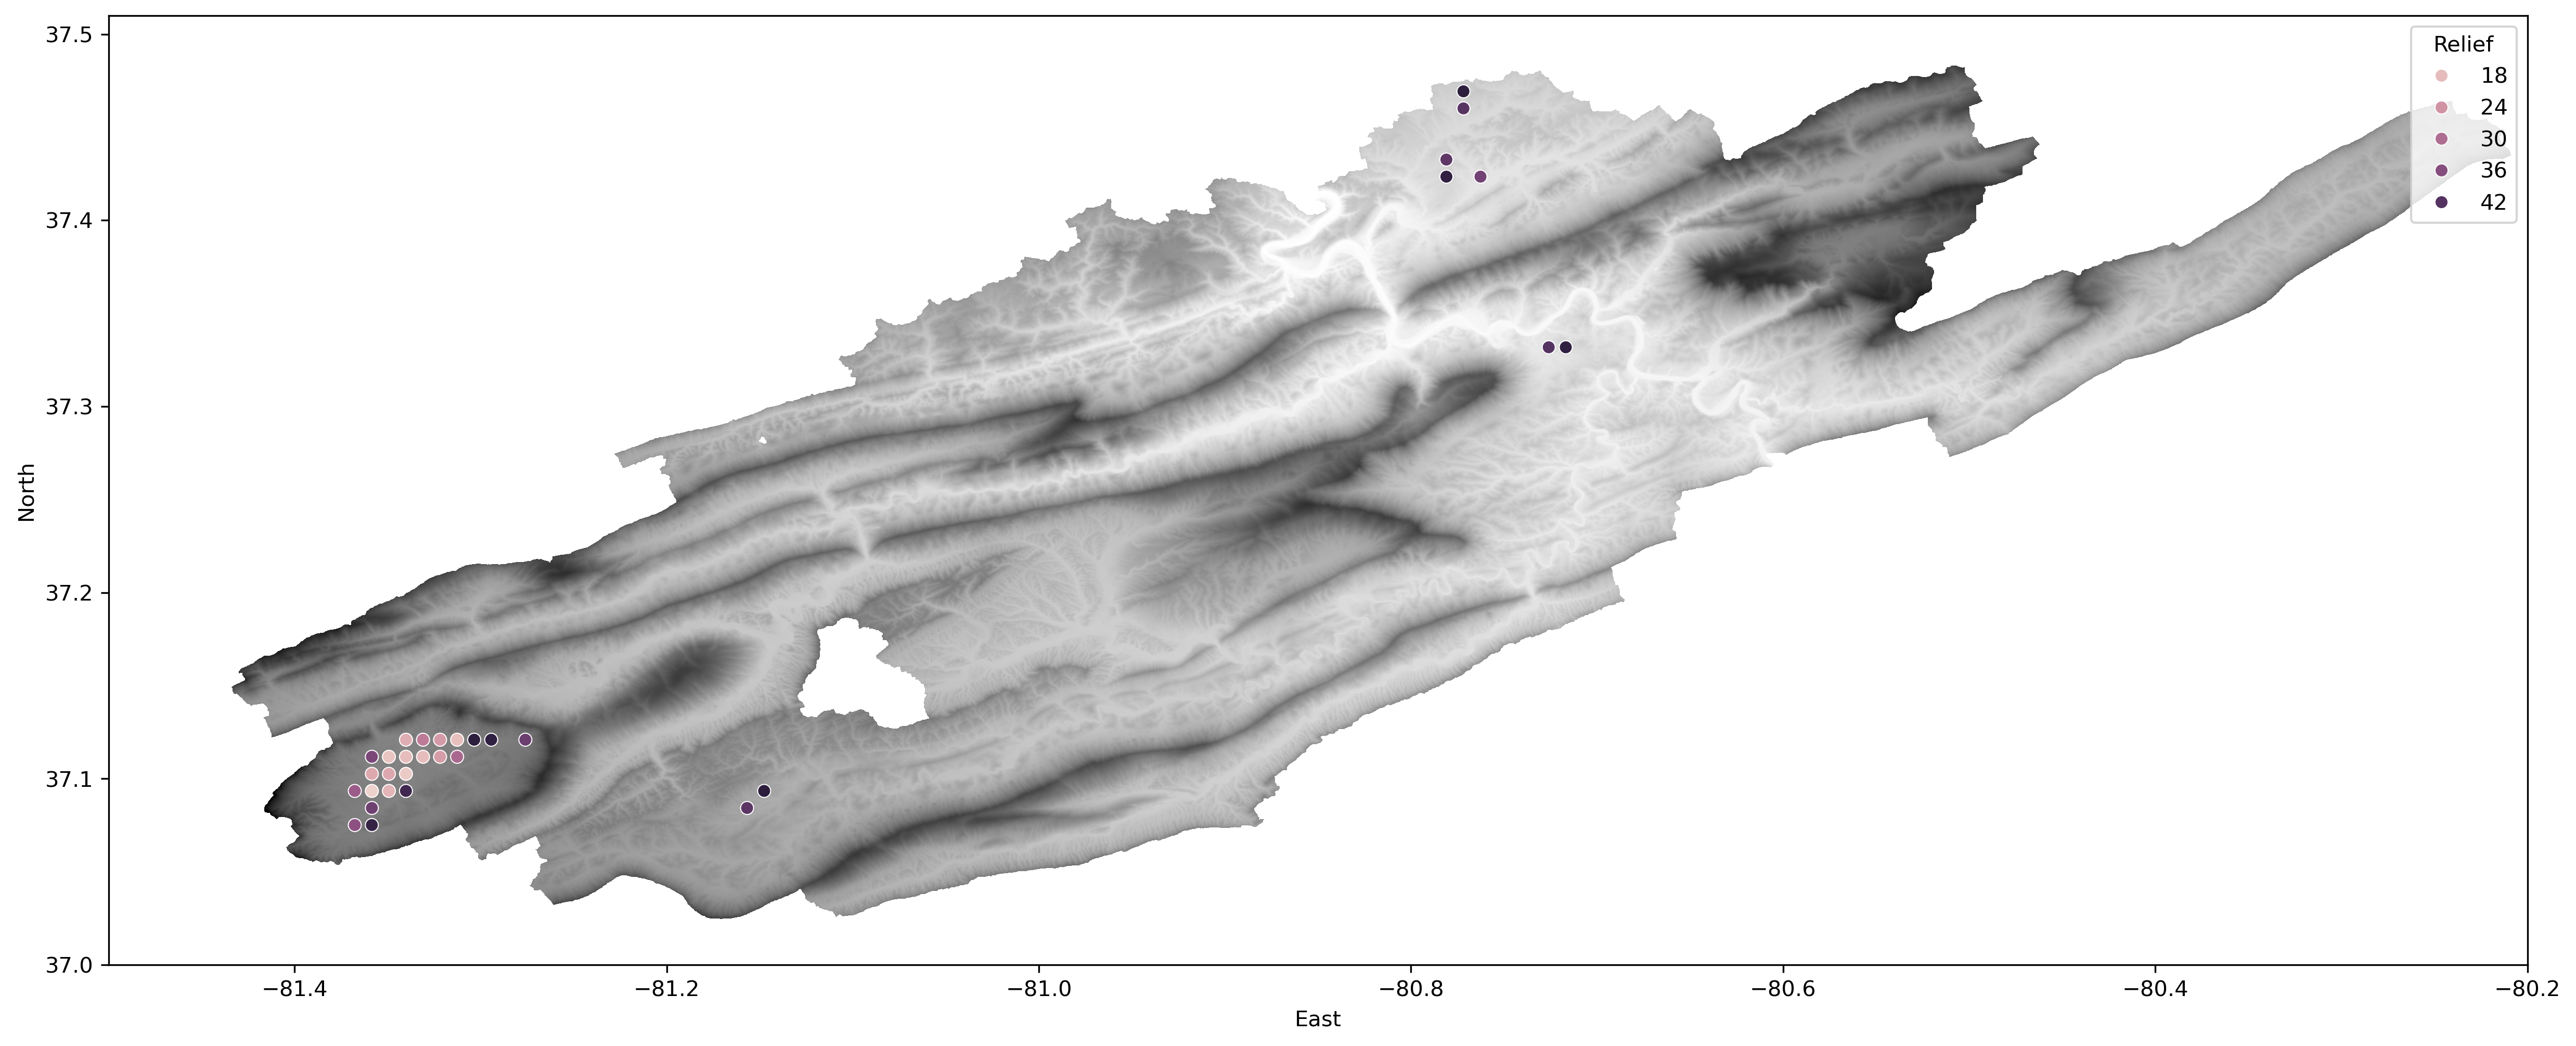

In [11]:
fig, ax = plt.subplots(figsize=(20,20), dpi=300)
src = rasterio.open('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/watersheds/output_raster_21.tiff')
basemap = show(src, cmap='binary', ax=ax)

def map_relict(df):
    df = df[df['relict']==True]
    sns.scatterplot(data=df, x='East', y='North', hue='Relief', ax=ax)

map_relict(results[21])
ax.set_ylim(bottom=37, top=37.51)
ax.set_xlim(left=-81.5, right=-80.20)

In [18]:
gdf = gpd.read_file('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/peripherals/geology/VA/VA_geol_poly.shp')

In [22]:
regions = gpd.read_file('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/peripherals/regions/Virginia_Physiographic_Regions.shp')

<Axes: >

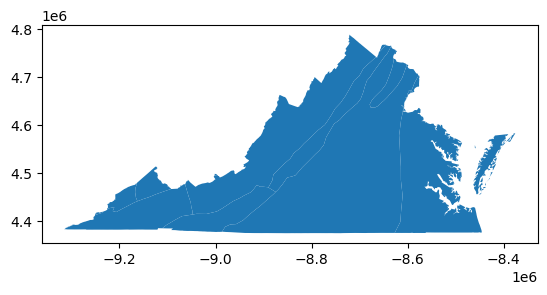

In [25]:
regions.plot()